In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("wiki.csv")
df = pd.DataFrame(df.groupby(['topic'], as_index=False).apply(lambda x: x.sum()))
df['text']=df['text'].astype('str')

In [3]:
print(type(df['text']))
df.head()

<class 'pandas.core.series.Series'>


,text,topic
0,Aquí se da una lista con los países que celebr...,<200 https://es.wikipedia.org/wiki/Anexo:D%C3%...
1,El Gran Premio de Estiria de 2020 es la segund...,<200 https://es.wikipedia.org/wiki/Anexo:Gran_...
2,"Las Bahamas, oficialmente la Mancomunidad de L...",<200 https://es.wikipedia.org/wiki/Bahamas><20...
3,El Día Mundial de la Población es un evento an...,<200 https://es.wikipedia.org/wiki/D%C3%ADa_Mu...
4,La Declaración de Independencia de la Argentin...,<200 https://es.wikipedia.org/wiki/Declaraci%C...


In [16]:
import re
from collections import Counter
df['text'] = df.apply(lambda x: x['text'].lower(), axis=1)
df['tokens'] = df.apply(lambda x: re.split('\W+',x['text']), axis=1)
df['conteo'] = df.apply(lambda x: Counter(x['tokens']), axis=1)
df['N'] = df.apply(lambda x: sum(x['conteo'].values()), axis=1)
df['V'] = df.apply(lambda x: len(x['conteo']), axis=1)

##df['num_words_title'] = df.apply(lambda x : len(x['Title'].split(" ")),axis=1)

In [5]:
df['conteo'].head()

0    {'': 1, 'como': 2, 'lo': 8, 'día': 4, 'nótese'...
1    {'': 1, 'inmediatamente': 2, 'austria': 4, 'do...
2    {'': 1, 'practicados': 2, 'fuerte': 2, 'millas...
3    {'madres': 2, 'ha': 4, 'inversiones': 2, 'aque...
4    {'': 1, 'dispuso': 1, 'había': 3, 'podían': 1,...
Name: conteo, dtype: object

In [6]:
cnt = df['conteo'][0]
sum(cnt.values())
sum(df['conteo'][0].values())

131

In [7]:
print(df['topic'])

0     <200 https://es.wikipedia.org/wiki/Anexo:D%C3%...
1     <200 https://es.wikipedia.org/wiki/Anexo:Gran_...
2     <200 https://es.wikipedia.org/wiki/Bahamas><20...
3     <200 https://es.wikipedia.org/wiki/D%C3%ADa_Mu...
4     <200 https://es.wikipedia.org/wiki/Declaraci%C...
5     <200 https://es.wikipedia.org/wiki/Elecciones_...
6     <200 https://es.wikipedia.org/wiki/Elecciones_...
7     <200 https://es.wikipedia.org/wiki/Elecciones_...
8     <200 https://es.wikipedia.org/wiki/Kiribati><2...
9     <200 https://es.wikipedia.org/wiki/Mongolia><2...
10    <200 https://es.wikipedia.org/wiki/Palaos><200...
11    <200 https://es.wikipedia.org/wiki/Pandemia_de...
12    <200 https://es.wikipedia.org/wiki/Santo_Tom%C...
13    <200 https://es.wikipedia.org/wiki/Sud%C3%A1n_...
Name: topic, dtype: object


In [8]:
print(df['text'][0])

aquí se da una lista con los países que celebran oficialmente el día de la independencia, con la respectiva fecha de cada uno y el evento que lo inspira. nótese que algunos de los estados representados nunca se independizaron (españa, reino unido, italia, japón, tailandia....) por lo que no tiene sentido ponerles un día específico de celebración como sí se lo haría de lo contrario.
aquí se da una lista con los países que celebran oficialmente el día de la independencia, con la respectiva fecha de cada uno y el evento que lo inspira. nótese que algunos de los estados representados nunca se independizaron (españa, reino unido, italia, japón, tailandia....) por lo que no tiene sentido ponerles un día específico de celebración como sí se lo haría de lo contrario.



In [9]:
df.head()

,text,topic,tokens,conteo,N
0,aquí se da una lista con los países que celebr...,<200 https://es.wikipedia.org/wiki/Anexo:D%C3%...,"[aquí, se, da, una, lista, con, los, países, q...","{'': 1, 'como': 2, 'lo': 8, 'día': 4, 'nótese'...",131
1,el gran premio de estiria de 2020 es la segund...,<200 https://es.wikipedia.org/wiki/Anexo:Gran_...,"[el, gran, premio, de, estiria, de, 2020, es, ...","{'': 1, 'inmediatamente': 2, 'austria': 4, 'do...",369
2,"las bahamas, oficialmente la mancomunidad de l...",<200 https://es.wikipedia.org/wiki/Bahamas><20...,"[las, bahamas, oficialmente, la, mancomunidad,...","{'': 1, 'practicados': 2, 'fuerte': 2, 'millas...",4791
3,el día mundial de la población es un evento an...,<200 https://es.wikipedia.org/wiki/D%C3%ADa_Mu...,"[el, día, mundial, de, la, población, es, un, ...","{'madres': 2, 'ha': 4, 'inversiones': 2, 'aque...",1151
4,la declaración de independencia de la argentin...,<200 https://es.wikipedia.org/wiki/Declaraci%C...,"[la, declaración, de, independencia, de, la, a...","{'': 1, 'dispuso': 1, 'había': 3, 'podían': 1,...",1878


In [10]:
df['N']

0      131
1      369
2     4791
3     1151
4     1878
5     1435
6     1031
7      219
8     2502
9     7111
10    4926
11    5661
12    2575
13    4700
Name: N, dtype: int64

In [11]:
df['conteo'].head()

0    {'': 1, 'como': 2, 'lo': 8, 'día': 4, 'nótese'...
1    {'': 1, 'inmediatamente': 2, 'austria': 4, 'do...
2    {'': 1, 'practicados': 2, 'fuerte': 2, 'millas...
3    {'madres': 2, 'ha': 4, 'inversiones': 2, 'aque...
4    {'': 1, 'dispuso': 1, 'había': 3, 'podían': 1,...
Name: conteo, dtype: object

In [13]:
type(df['conteo'][0])

collections.Counter

In [15]:
len(df['conteo'][0])

49

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Vocabulario')

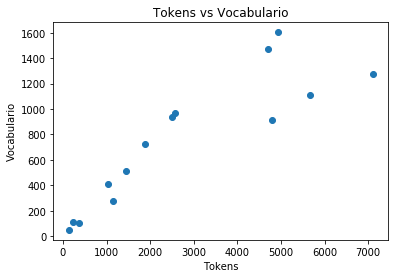

In [21]:
plt.scatter(df['N'],df['V'])
plt.title('Tokens vs Vocabulario')
plt.xlabel('Tokens')
plt.ylabel('Vocabulario')
